## En este proyecto se crearon 3 modelos distintos de clasificación asi como su optimización de hiperparametros para ver cual es el modelo que mas se ajusta. En este caso el mejor modelo para predecir los datos de cancer fue la **regresion logistica** con un **F1 de 0.9421**.

### los modelos empleados fueron Regresion Logistica, K-vecinos y Maquina de Soporte Vectorial. Donde a cada modelo se le aplico la optimización de hiperparametros mediante la busqueda por malla GRIDSEARCHCV.

### Todos estos modelos fueron de aprendizaje supervisado con la libreria sklearn.



## Importando librerias basicas

In [ ]:
!pip install siuba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install plotnine

In [1]:
import os
import pandas as pd
import numpy as np
from siuba import *
from siuba.dply.vector import *
from plotnine import *

## visualizando la data

In [2]:
archivo="cancer_mama.csv"
mi_data=pd.read_csv(archivo)

In [3]:
mi_data.shape

(569, 31)

In [4]:
mi_data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'diagnosis'],
      dtype='object')

In [5]:
mi_data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# EDA

In [6]:
mi_data.info() #observamos si hay archivos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [7]:
mi_data.describe() #observamos la distribución de los datos 

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
mi_data.duplicated().sum()

0

In [10]:
import seaborn as sns

In [11]:
mi_data.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean_compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean_concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean_concave_points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean_symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean_fractal_dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Axes: >

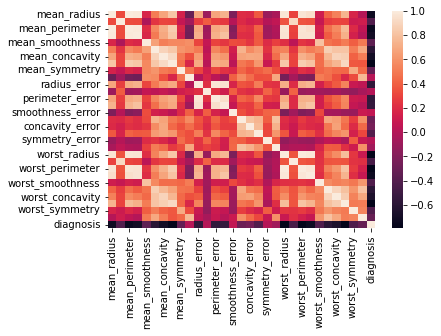

In [12]:
sns.heatmap(mi_data.corr())

## Separando la data en variables objetivo(y) y variables de entranamiento(X) 
### ASi como en de prueba y entrenamiento

In [ ]:
mi_data>>group_by(_.diagnosis)>>summarize(conteo_objetivo=n(_),porcentaje_objetivo=n(_)/mi_data.shape[0])

,diagnosis,conteo_objetivo,porcentaje_objetivo
0,0,212,0.372583
1,1,357,0.627417


In [ ]:
mi_data=mi_data>>mutate(diagnosis=_.diagnosis.replace({0:1,1:0})) #ccambiamos a partir de un diccionario el 1 a cancer maligno
                                                                  #y el 0 a cancer benigno

In [ ]:
# separamos los datos en datos objetivo y nuestras variables independientes
var_independ=mi_data>>select(-_.diagnosis)
objetive=mi_data>>select(_.diagnosis)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Separamos nuestros datos de entrenamiento y de prueba
indepen_train,indepen_test,objetive_train,objetive_test=train_test_split(var_independ,objetive,test_size=0.3,random_state=42)

## Implementando modelos sobre la data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
objetive_train["diagnosis"]

149    0
124    0
421    0
195    0
545    0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 398, dtype: int64

In [ ]:
#cargamos el modelo regresión logistica(logistic regression)
model_lr=LogisticRegression(solver="liblinear") #usamos N-C debido a que tenemos mas datos de renglones que de columnas
model_lr.fit(indepen_train,objetive_train.values.ravel())

LogisticRegression(solver='liblinear')

In [ ]:
predic_lr=model_lr.predict(indepen_test)
prob_predic_lr=model_lr.predict_proba(indepen_test)
real_objetive_lr=objetive_test.values.ravel()

In [ ]:
def tupla_clase_prediccion(y_real, y_pred): #creamos una función  que le daremos dos listas, el valor verdadero y la etiqueta de predicción
    return list(zip(y_real, y_pred))        #nos arrojará una lista de parejas(producto cartesiano)
def VP(clases_reales, predicciones):                                #definirmos el VP (verdadero positivo)
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones) #creamos una tupla con los c
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==1])  #internamente crea una lista donde va a meter en ella los que tenga (1,1)
def VN(clases_reales, predicciones):                               #definimos VN (verdadero negativo)
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==0])#internamente crea una lista donde va a meter en ella los que tenga (0,0)
def FP(clases_reales, predicciones):                              #definimos FP(Falso positivo)
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==1])#internamente crea una lista donde va a meter en ella los que tenga (0,1)
def FN(clases_reales, predicciones):                             #definimos FN(Falso negativo) este FN es de interes pues queremos disminuir este para evitar gente muerta
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones) #se utiliza la sencibiliad(recall) pues si obtenemos Sencibilidad=1=VP/(VP+FP) entonces FP=0
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==0])#internamente crea una lista donde va a meter en ella los que tenga (1,0)

In [ ]:
print("""
Verdaderos Positivos: {}
Verdaderos Negativos: {}
Falsos Positivos: {}
Falsos Negativos: {}
""".format(
    VP(real_objetive_lr, predic_lr),
    VN(real_objetive_lr, predic_lr),
    FP(real_objetive_lr, predic_lr),
    FN(real_objetive_lr, predic_lr)
))


Verdaderos Positivos: 59
Verdaderos Negativos: 106
Falsos Positivos: 2
Falsos Negativos: 4



In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix_rl = confusion_matrix(real_objetive_lr, predic_lr)
cf_matrix_rl

array([[106,   2],
       [  4,  59]])

<Axes: >

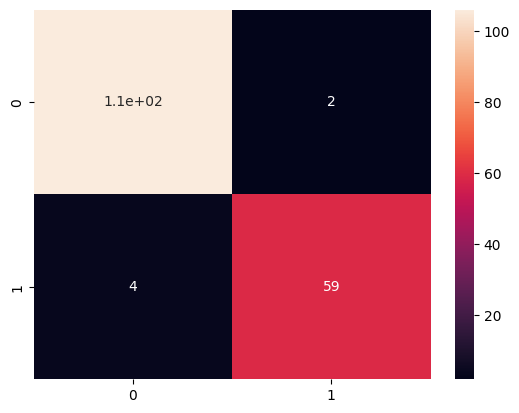

In [ ]:
import seaborn as sns


sns.heatmap(cf_matrix_rl, annot=True)

# Optimizando hiperparametros

In [ ]:
estimador_lr=LogisticRegression()

In [ ]:
print(estimador_lr.__doc__) #pedimos que imprima informaci+on del estimador
estimador_lr.get_params()


    Logistic Regression (aka logit, MaxEnt) classifier.

    In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
    scheme if the 'multi_class' option is set to 'ovr', and uses the
    cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
    (Currently the 'multinomial' option is supported only by the 'lbfgs',
    'sag', 'saga' and 'newton-cg' solvers.)

    This class implements regularized logistic regression using the
    'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
    that regularization is applied by default**. It can handle both dense
    and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
    floats for optimal performance; any other input format will be converted
    (and copied).

    The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
    with primal formulation, or no regularization. The 'liblinear' solver
    supports both L1 and L2 regularization, with a d

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parametros_busqueda_lr={ #damos algunos parametros para la busqueda por malla
    "penalty": ['l1'],
    "solver": ["liblinear","saga"],
    "max_iter":[50,100,150],
    "multi_class": ['auto', 'ovr', 'multinomial']
}
parametros_busqueda_lr2={ #damos algunos parametros para la busqueda por malla
    "penalty": ['l2'],
    "solver": ["lbfgs","newton-cg","newton-cholesky","sag"],
    "max_iter":[50,100,150],
    "multi_class": ['auto', 'ovr', 'multinomial']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

lr_grid = GridSearchCV(estimator=estimador_lr, #gridsearch es busqueda por malla, el estimador no tiene los parametros
                    param_grid=parametros_busqueda_lr, #en param_grid le pasamos la malla que es el diccionario param_busque_knn
                    scoring="f1", n_jobs=-1) #n_jobs es para ver que nucleos usar

lr_grid2 = GridSearchCV(estimator=estimador_lr, #gridsearch es busqueda por malla, el estimador no tiene los parametros
                    param_grid=parametros_busqueda_lr2, #en param_grid le pasamos la malla que es el diccionario param_busque_knn
                    scoring="f1", n_jobs=-1) #n_jobs es para ver que nucleos usar

In [ ]:
def evaluar_modelo(estimador, X, y):
    resultados_estimador = cross_validate(estimador, X, y,
                     scoring="f1", n_jobs=-1, cv=5) #pedimos micro pues los datos estan balanceados(distribuidos equitativamente)
    return resultados_estimador #en binaria se puede usar ROC AU, se usan 5 particiones de validacioon cruzada

def ver_resultados():             #promedia los resultados de la funcion anterior y nos da una tabla
    resultados_df=pd.DataFrame(resultados).T
    resultados_cols=resultados_df.columns
    for col in resultados_df:
        resultados_df[col]=resultados_df[col].apply(np.mean)
        resultados_df[col+"_idx"]=resultados_df[col]/resultados_df[col].max()
    return resultados_df>>arrange(-_.test_score,_.fit_time)


In [ ]:
resultados={}

In [ ]:
import time

start_time = time.time() #medimos el tiempo

lr_grid.fit(var_independ, objetive.values.ravel()) #entrenamos el modelo con la busqueda de malla

end_time = time.time() #medimos el tiempo de uevo
elapsed_time = end_time - start_time #vemos cuanto tiempo nos tomo

print(f"Elapsed time: {elapsed_time} seconds")

print(lr_grid.best_score_) #pedimos el mejor score del modelo
print(lr_grid.best_estimator_.get_params()) #pedimos que nos de los mejores parametros para el mejor score

resultados["lr_gridsearch"] = evaluar_modelo(lr_grid.best_estimator_, #entrenamos el modelo con los mejores hiperparametros
                                             var_independ,
                                             objetive.values.ravel())

ver_resultados()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 90, in _check_multi_class
    raise ValueE

Elapsed time: 9.895108461380005 seconds
0.9346708493482886
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 150, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


,fit_time,score_time,test_score,fit_time_idx,score_time_idx,test_score_idx
lr_gridsearch,0.372633,0.004021,0.931949,1.0,1.0,1.0


In [ ]:
start_time = time.time() #medimos el tiempo

lr_grid2.fit(var_independ, objetive.values.ravel()) #entrenamos el modelo con la busqueda de malla

end_time = time.time() #medimos el tiempo de uevo
elapsed_time = end_time - start_time #vemos cuanto tiempo nos tomo

print(f"Elapsed time: {elapsed_time} seconds")

print(lr_grid2.best_score_) #pedimos el mejor score del modelo
print(lr_grid2.best_estimator_.get_params()) #pedimos que nos de los mejores parametros para el mejor score

resultados["lr2_gridsearch"] = evaluar_modelo(lr_grid2.best_estimator_, #entrenamos el modelo con los mejores hiperparametros
                                             var_independ,
                                             objetive.values.ravel())

ver_resultados()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 90, in _check_multi_class
    raise Value

Elapsed time: 7.617293834686279 seconds
0.9421915490769017
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


,fit_time,score_time,test_score,fit_time_idx,score_time_idx,test_score_idx
lr2_gridsearch,0.263765,0.006571,0.942192,0.707842,1.000000,1.000000
lr_gridsearch,0.372633,0.004021,0.931949,1.000000,0.612009,0.989129


# Reentrenando el modelo

In [ ]:
model_lr_best=LogisticRegression(multi_class='multinomial',penalty='l2',solver="newton-cg") #usamos N-C debido a que tenemos mas datos de renglones que de columnas
model_lr_best.fit(indepen_train,objetive_train.values.ravel())

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
predic_lr_best=model_lr_best.predict(indepen_test)
prob_predic_lr_best=model_lr_best.predict_proba(indepen_test)
real_objetive_lr_best=objetive_test.values.ravel()

In [ ]:
print("""
Verdaderos Positivos: {}
Verdaderos Negativos: {}
Falsos Positivos: {}
Falsos Negativos: {}
""".format(
    VP(real_objetive_lr_best, predic_lr_best),
    VN(real_objetive_lr_best, predic_lr_best),
    FP(real_objetive_lr_best, predic_lr_best),
    FN(real_objetive_lr_best, predic_lr_best)
))


Verdaderos Positivos: 60
Verdaderos Negativos: 106
Falsos Positivos: 2
Falsos Negativos: 3



In [ ]:
cf_matrix_rl_best = confusion_matrix(real_objetive_lr_best, predic_lr_best)
cf_matrix_rl_best

array([[106,   2],
       [  3,  60]])

<Axes: >

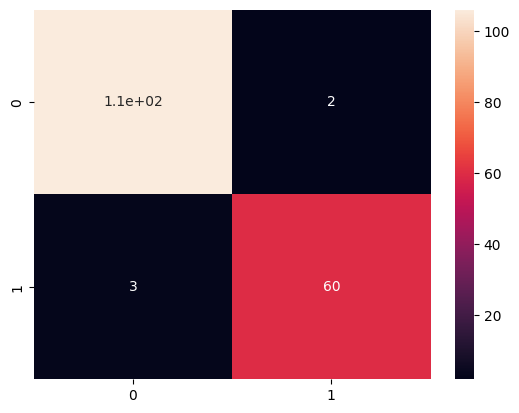

In [ ]:
sns.heatmap(cf_matrix_rl_best, annot=True)

# K-means, k-vecinos

In [ ]:
'''Carguemos el modelo K-vecinos'''

'Carguemos el modelo K-vecinos'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import f1_score
from siuba.dply.vector import *

In [ ]:
sorted(objetive_train["diagnosis"].unique())

[0, 1]

In [ ]:
'''Seleccionemos que k nos conviene y que modelo de k-vecinos'''

'Seleccionemos que k nos conviene y que modelo de k-vecinos'

In [ ]:
#definimos una funcion que calcula k-vecinos dependiendo el numero de vecinos y los pesos
def classifiers_knn(k):
    knn_uniforme = KNeighborsClassifier(n_neighbors=k, weights="uniform") #cargamos el modelo de k vecinos
    knn_distancias = KNeighborsClassifier(n_neighbors=k, weights="distance") #cargamos modelo de k-vecinos con distancias
    knn_uniforme.fit(indepen_train, objetive_train["diagnosis"])
    knn_distancias.fit(indepen_train, objetive_train["diagnosis"])
    preds_uniforme = knn_uniforme.predict(indepen_test)
    preds_distancias = knn_distancias.predict(indepen_test)
    f1_uniforme = f1_score(objetive_test, preds_uniforme, average="micro")    #calculamos el F1 para los k-vecinos
    f1_distancias = f1_score(objetive_test, preds_distancias, average="micro") #calculamos el F1 a los k-vecinos con distancias
    return (k,f1_uniforme,f1_distancias)                           #esta funcion hace todo lo anterior pero con el valor
                                                                   #que definamos de K


In [ ]:
mi_data.shape[0]**0.5 #k limite nos dice hasta donde debe ser el limite de vecinos pero vemos que no se hubierna encontrado
#mejores F1. No hay regla general en la cual nos diga hasta cual llegar

23.853720883753127

In [ ]:
evaluation_classification=[classifiers_knn(k) for k in range(1,24,1)]
#pedimos que nos calcule la funcion anterior para cada k en el rango de 1-149 con saltos de 2 en 2

In [ ]:
evaluation_classification = pd.DataFrame(evaluation_classification,
                                          columns = ["k","F1_uniforme","F1_distancias"]) #lo transformamos en un DF

In [ ]:
evaluation_classification

,k,F1_uniforme,F1_distancias
0,1,0.935673,0.935673
1,2,0.941520,0.935673
2,3,0.941520,0.947368
3,4,0.953216,0.941520
4,5,0.959064,0.953216
5,6,0.953216,0.947368
6,7,0.964912,0.959064
7,8,0.964912,0.959064
8,9,0.970760,0.964912
9,10,0.959064,0.964912


In [ ]:
evaluation_classification_tidy = evaluation_classification >> gather("F1_tipo",
                                                                         "F1_score",
                                                                         -_.k)
#tabla formato ancho(largo) cuando la tabla tiene columnas distitas que miden lo mismo, en esta creamos la columna f1_tipo, la columna f1_score
#y mantenemos la columna k

In [ ]:
evaluation_classification_tidy

,k,F1_tipo,F1_score
0,1,F1_uniforme,0.935673
1,2,F1_uniforme,0.941520
2,3,F1_uniforme,0.941520
3,4,F1_uniforme,0.953216
4,5,F1_uniforme,0.959064
5,6,F1_uniforme,0.953216
6,7,F1_uniforme,0.964912
7,8,F1_uniforme,0.964912
8,9,F1_uniforme,0.970760
9,10,F1_uniforme,0.959064


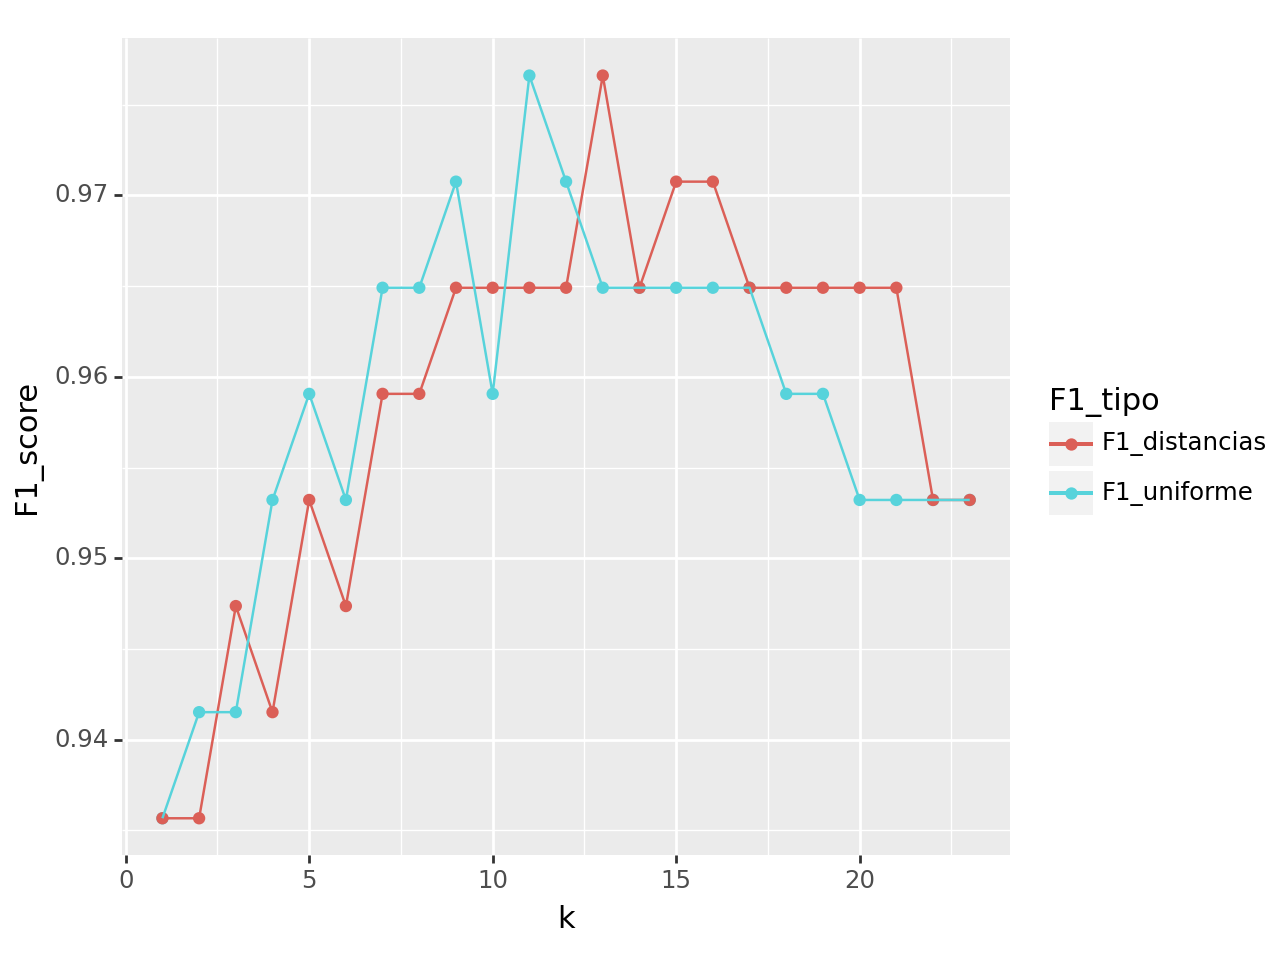

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(data = evaluation_classification_tidy) +
    geom_point(mapping=aes(x="k",y="F1_score",color="F1_tipo")) +
    geom_line(mapping=aes(x="k",y="F1_score",color="F1_tipo"))
)
# en la grafica podemos observar que nos conviene usar el modelo de distancias con k=75,77,79, entonces k=75

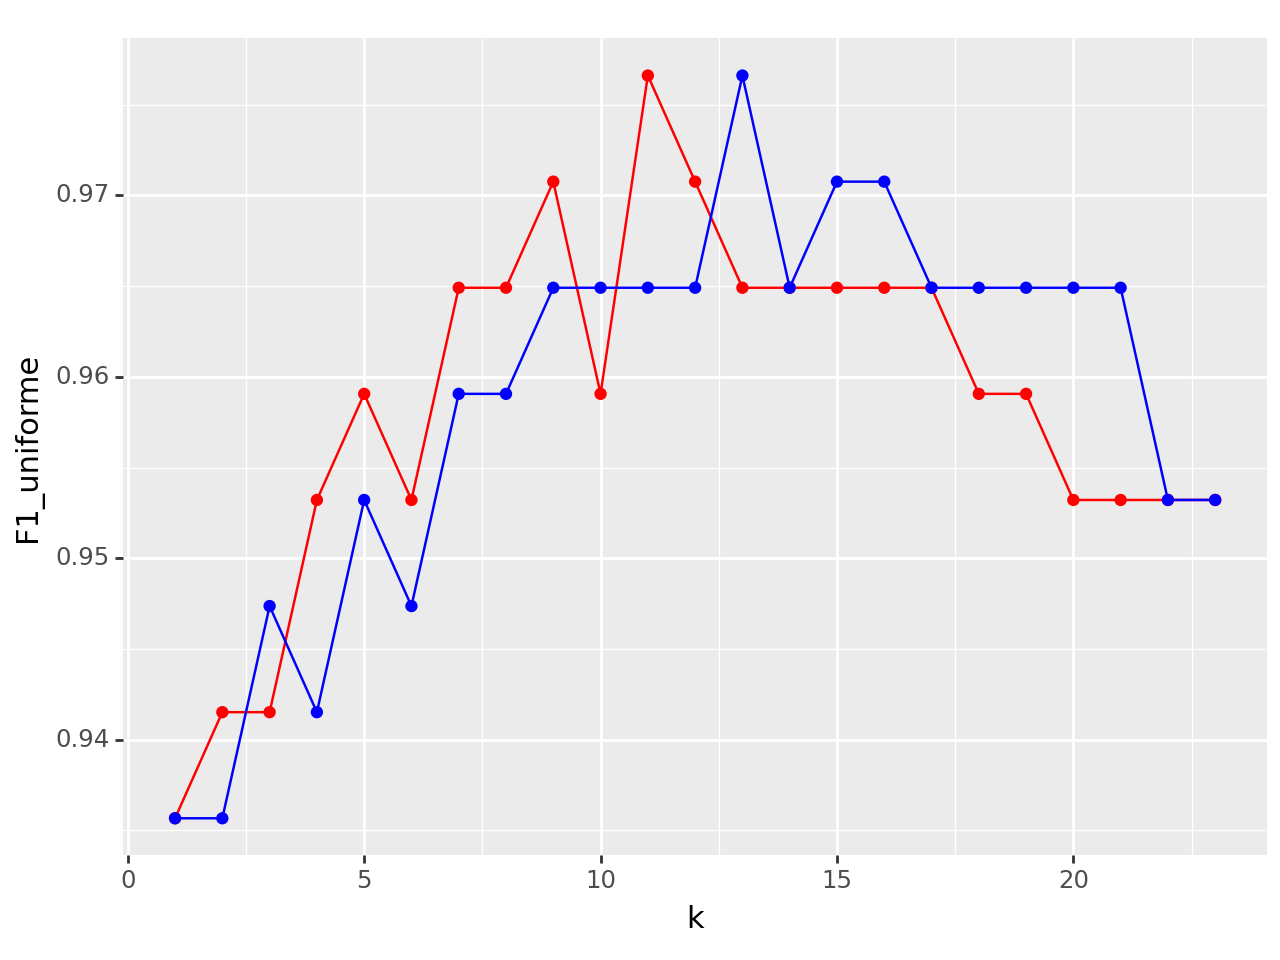

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(data = evaluation_classification) +
    geom_point(mapping=aes(x="k",y="F1_uniforme"),color = "red") +
    geom_line(mapping=aes(x="k",y="F1_uniforme"),color = "red") +
    geom_point(mapping=aes(x="k",y="F1_distancias"),color = "blue") +
    geom_line(mapping=aes(x="k",y="F1_distancias"),color = "blue")
)


In [ ]:
(evaluation_classification >>
    filter((_.F1_uniforme == _.F1_uniforme.max()) | (_.F1_distancias == _.F1_distancias.max()))
) #nos quedamos con el numero de vecinos menores, en este caso k=75 vecinos

,k,F1_uniforme,F1_distancias
10,11,0.976608,0.964912
12,13,0.964912,0.976608


# optimización de hiperparametros usando malla

In [ ]:
estimador_knn=KNeighborsClassifier()
print(estimador_knn.__doc__) #pedimos que imprima informaci+on del estimador
estimador_knn.get_params() #pedimos que umprima los parametros que usa el estimador

Classifier implementing the k-nearest neighbors vote.

    Read more in the :ref:`User Guide <classification>`.

    Parameters
    ----------
    n_neighbors : int, default=5
        Number of neighbors to use by default for :meth:`kneighbors` queries.

    weights : {'uniform', 'distance'}, callable or None, default='uniform'
        Weight function used in prediction.  Possible values:

        - 'uniform' : uniform weights.  All points in each neighborhood
          are weighted equally.
        - 'distance' : weight points by the inverse of their distance.
          in this case, closer neighbors of a query point will have a
          greater influence than neighbors which are further away.
        - [callable] : a user-defined function which accepts an
          array of distances, and returns an array of the same shape
          containing the weights.

    algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
        Algorithm used to compute the nearest neighbo

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
parametros_busqueda_knn={ #damos algunos parametros para la busqueda por malla
    "n_neighbors": [1,5,10,15,24],
    "p": [1,2,3],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto","ball_tree","kd_tree","brute"]
}

In [ ]:
knn_grid=GridSearchCV(estimator=estimador_knn, #gridsearch es busqueda por malla, el estimador no tiene los parametros
                    param_grid=parametros_busqueda_knn, #en param_grid le pasamos la malla que es el diccionario param_busque_knn
                    scoring="f1", n_jobs=-1) #n_jobs es para ver que nucleos usar

In [ ]:
start_time = time.time() #medimos el tiempo

knn_grid.fit(var_independ, objetive.values.ravel()) #entrenamos el modelo con la busqueda de malla

end_time = time.time() #medimos el tiempo de uevo
elapsed_time = end_time - start_time #vemos cuanto tiempo nos tomo

print(f"Elapsed time: {elapsed_time} seconds")

print(knn_grid.best_score_) #pedimos el mejor score del modelo
print(knn_grid.best_estimator_.get_params()) #pedimos que nos de los mejores parametros para el mejor score

resultados["knn_gridsearch"] = evaluar_modelo(knn_grid.best_estimator_, #entrenamos el modelo con los mejores hiperparametros
                                             var_independ,
                                             objetive.values.ravel())

ver_resultados()

Elapsed time: 10.422969818115234 seconds
0.9066498458858596
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


,fit_time,score_time,test_score,fit_time_idx,score_time_idx,test_score_idx
lr2_gridsearch,0.263765,0.006571,0.942192,0.707842,0.538388,1.000000
lr_gridsearch,0.372633,0.004021,0.931949,1.000000,0.329498,0.989129
knn_gridsearch,0.005008,0.012205,0.906650,0.013440,1.000000,0.962278


In [ ]:
'''Utilizando distancia, penality 1 y n vecinos 10'''

'Utilizando distancia, penality 1 y n vecinos 10'

In [ ]:
model_knn_uniform = KNeighborsClassifier(n_neighbors=10, p=1, weights="distance") #ponemos 15 vecinos que fue
#el mejor que nos dio para el modelo uniforme
model_knn_uniform.fit(indepen_train, objetive_train["diagnosis"])

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

In [ ]:
predic_knn = model_knn_uniform.predict(indepen_test) #pedimos que el modelo nos dara los valores de predict de la zona de prueba
predic_prob = model_knn_uniform.predict_proba(indepen_test)  #pedimos las probabilidades de los datos de prueba o test
real_objetive = objetive_test.values.ravel()#.values. ravel() lo usamos para tener una lista(array) y no una dataframe que nos lo da siuba
                                                #a objetivos_reales le pedimos que sea una lista

In [ ]:
f1_score(real_objetive, predic_knn)

0.9593495934959351

In [ ]:
print("""
Verdaderos Positivos: {}
Verdaderos Negativos: {}
Falsos Positivos: {}
Falsos Negativos: {}
""".format(
    VP(real_objetive, predic_knn),
    VN(real_objetive, predic_knn),
    FP(real_objetive, predic_knn),
    FN(real_objetive, predic_knn)
))


Verdaderos Positivos: 59
Verdaderos Negativos: 107
Falsos Positivos: 1
Falsos Negativos: 4



In [ ]:
cf_matrix_knn_best = confusion_matrix(real_objetive, predic_knn)
cf_matrix_knn_best

array([[107,   1],
       [  4,  59]])

<Axes: >

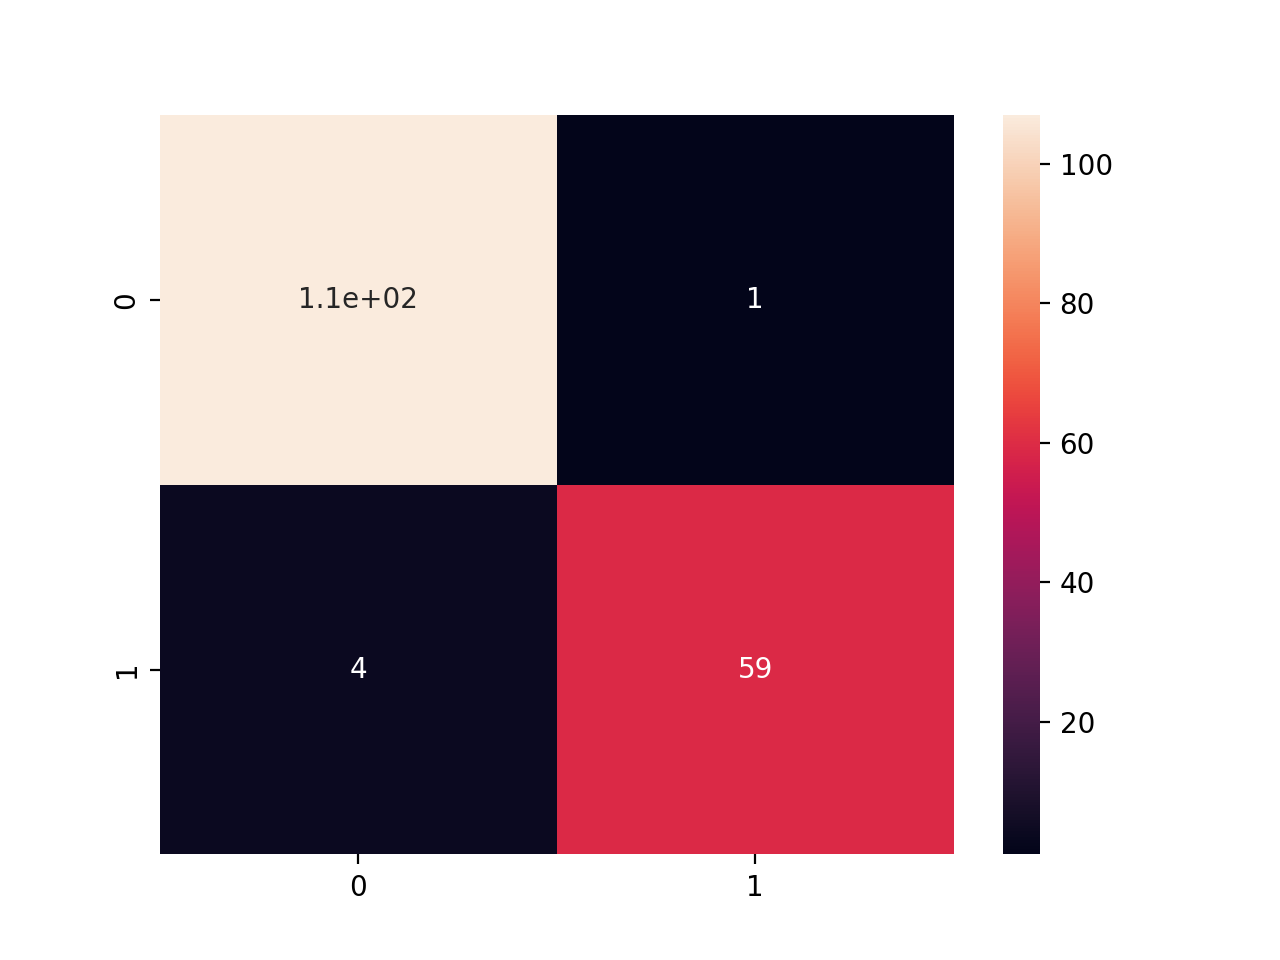

In [ ]:
sns.heatmap(cf_matrix_knn_best, annot=True)

In [ ]:
print("""se obtuvieron los siguientes falsos negativos
      FN regresion logistica: {}
      FN K-vecinos uniforme:{}
      """.format(
    FN(real_objetive_lr_best, predic_lr_best),
    FN(real_objetive, predic_knn)
))

se obtuvieron los siguientes falsos negativos
      FN regresion logistica: 3
      FN K-vecinos uniforme:4
      


# SVM

## Utilizaré solamente las variables que midan promedio, es decir 10 variables de la tabla original

In [ ]:
#recordemos
# separamos los datos en datos objetivo y nuestras variables independientes
var_independ=mi_data>>select(-_.diagnosis)
objetive=mi_data>>select(_.diagnosis)

In [ ]:
var_independ.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [ ]:
var_independ_svm=var_independ>>select(_.mean_radius,_.mean_texture,_.mean_perimeter,_.mean_area,
                                      _.mean_smoothness,_.mean_compactness,_.mean_concavity,_.mean_concave_points,
                                      _.mean_symmetry,_.mean_fractal_dimension)

In [ ]:
var_independ_svm

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
from sklearn.svm import SVC

In [ ]:
estimador_svm=SVC()
print(estimador_svm.__doc__)
estimador_svm.get_params()

C-Support Vector Classification.

    The implementation is based on libsvm. The fit time scales at least
    quadratically with the number of samples and may be impractical
    beyond tens of thousands of samples. For large datasets
    consider using :class:`~sklearn.svm.LinearSVC` or
    :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
    :class:`~sklearn.kernel_approximation.Nystroem` transformer or
    other :ref:`kernel_approximation`.

    The multiclass support is handled according to a one-vs-one scheme.

    For details on the precise mathematical formulation of the provided
    kernel functions and how `gamma`, `coef0` and `degree` affect each
    other, see the corresponding section in the narrative documentation:
    :ref:`svm_kernels`.

    Read more in the :ref:`User Guide <svm_classification>`.

    Parameters
    ----------
    C : float, default=1.0
        Regularization parameter. The strength of the regularization is
        inversely proport

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### Usaremos dos diccionarios uno para kernel gaussiano y otro polinimial para disminuir tiempo computacional

In [ ]:
parametros_busqueda_svm_pol={
    "degree": [1,2,3,4],
    "kernel": ["poly"]
}

In [ ]:
parametros_busqueda_svm_gauss={
    "gamma": [0.1,0.5,1.,10.],
    "kernel": ["rbf"]
}

In [ ]:
svm_grid_pol= GridSearchCV(estimator=estimador_svm,  #en caso de random busca de manera aleatoria sin darle preferencia
                    param_grid=parametros_busqueda_svm_pol,
                   scoring="f1", n_jobs=-1)
svm_grid_pol.fit(var_independ_svm, objetive.values.ravel())

print(svm_grid_pol.best_estimator_)
resultados["svm_gridsearch_pol"]=evaluar_modelo(svm_grid_pol.best_estimator_,
                                            var_independ_svm,
                                            objetive.values.ravel())

ver_resultados()

SVC(kernel='poly')


,fit_time,score_time,test_score,fit_time_idx,score_time_idx,test_score_idx
lr2_gridsearch,0.263765,0.006571,0.942192,0.707842,0.418256,1.000000
lr_gridsearch,0.372633,0.004021,0.931949,1.000000,0.255976,0.989129
knn_gridsearch,0.005008,0.012205,0.906650,0.013440,0.776868,0.962278
svm_gridsearch_pol,0.014912,0.011952,0.828977,0.040017,0.760775,0.879839
svm_randomsearch_pol,0.015307,0.009652,0.828977,0.041078,0.614406,0.879839
svm_randomsearch_gau,0.037292,0.013986,0.464584,0.100078,0.890247,0.493089
svm_gridsearch_gau,0.033276,0.015710,0.000000,0.089300,1.000000,0.000000


In [ ]:
svm_grid_gau= GridSearchCV(estimator=estimador_svm,  #en caso de random busca de manera aleatoria sin darle preferencia
                    param_grid=parametros_busqueda_svm_gauss,
                   scoring="f1", n_jobs=-1) #selecciona solo 10 de las posibles convinaciones y ellas las evalua
svm_grid_gau.fit(var_independ_svm, objetive.values.ravel())

print(svm_grid_gau.best_estimator_)
resultados["svm_gridsearch_gau"]=evaluar_modelo(svm_grid_gau.best_estimator_,
                                            var_independ_svm,
                                            objetive.values.ravel())

ver_resultados()

SVC(gamma=0.1)


,fit_time,score_time,test_score,fit_time_idx,score_time_idx,test_score_idx
lr2_gridsearch,0.263765,0.006571,0.942192,0.707842,0.469820,1.000000
lr_gridsearch,0.372633,0.004021,0.931949,1.000000,0.287534,0.989129
knn_gridsearch,0.005008,0.012205,0.906650,0.013440,0.872642,0.962278
svm_gridsearch_pol,0.014912,0.011952,0.828977,0.040017,0.854566,0.879839
svm_randomsearch_pol,0.015307,0.009652,0.828977,0.041078,0.690152,0.879839
svm_gridsearch_gau,0.024099,0.010927,0.464584,0.064673,0.781291,0.493089
svm_randomsearch_gau,0.037292,0.013986,0.464584,0.100078,1.000000,0.493089


In [ ]:
model_svm=SVC(kernel='poly',probability=True)
model_svm.fit(indepen_train,objetive_train.values.ravel())

SVC(kernel='poly', probability=True)

In [ ]:
predic_svm = model_svm.predict(indepen_test) #pedimos que el modelo nos dara los valores de predict de la zona de prueba
predic_prob_svm = model_svm.predict_proba(indepen_test)  #pedimos las probabilidades de los datos de prueba o test
real_objetive = objetive_test.values.ravel()#.values. ravel() lo usamos para tener una lista(array) y no una dataframe que nos lo da siuba
                                                #a objetivos_reales le pedimos que sea una lista

In [ ]:
print("""
Verdaderos Positivos: {}
Verdaderos Negativos: {}
Falsos Positivos: {}
Falsos Negativos: {}
""".format(
    VP(real_objetive, predic_svm),
    VN(real_objetive, predic_svm),
    FP(real_objetive, predic_svm),
    FN(real_objetive, predic_svm)
))


Verdaderos Positivos: 54
Verdaderos Negativos: 107
Falsos Positivos: 1
Falsos Negativos: 9



In [ ]:
cf_matrix_svm = confusion_matrix(real_objetive, predic_svm)
cf_matrix_svm

array([[107,   1],
       [  9,  54]])

<Axes: >

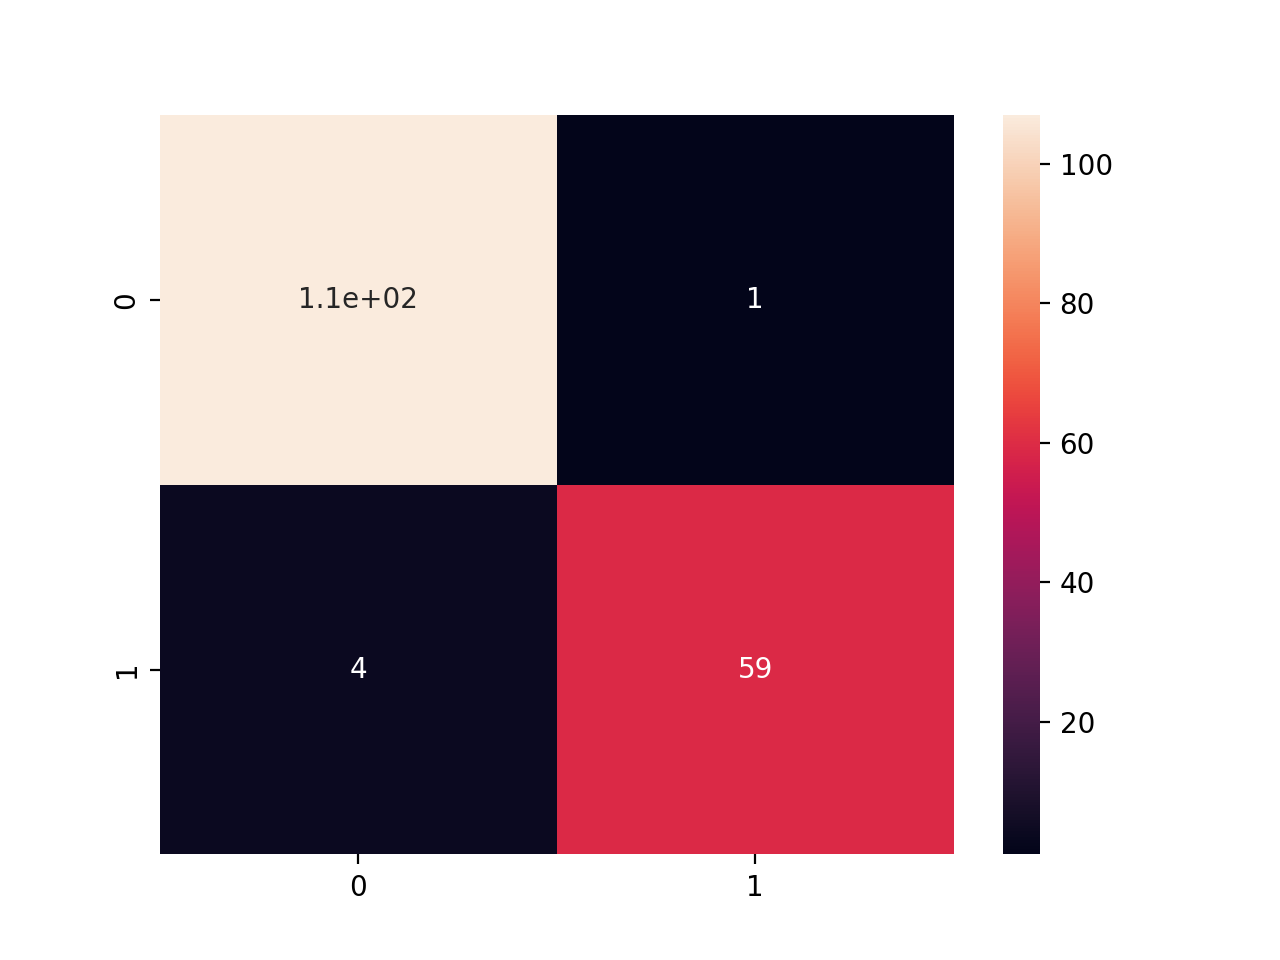

In [ ]:
sns.heatmap(cf_matrix_knn_best, annot=True)

# visualización predicciones

In [ ]:
def tupla_clase_prediccion(y_real, y_pred_lr,y_pred_kn,y_pred_svm): #creamos una función  que le daremos dos listas, el valor verdadero y la etiqueta de predicción
    return list(zip(y_real, y_pred_lr,y_pred_kn,y_pred_svm))        #nos arrojará una lista de parejas(producto cartesiano)

In [ ]:
tupla_clase_prediccion(real_objetive, predic_lr,predic_knn,predic_svm)[:20] #nos arroja el objetivo de prueba en pareja junto con su predicción

[(0, 0, 0, 0),
 (1, 1, 1, 1),
 (1, 1, 1, 1),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (1, 1, 1, 1),
 (1, 1, 1, 1),
 (1, 1, 1, 1),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (1, 1, 1, 1),
 (0, 0, 0, 0),
 (1, 1, 0, 1),
 (0, 0, 0, 0),
 (1, 1, 1, 1),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (1, 1, 1, 1)]

In [ ]:
List_pred=list(tupla_clase_prediccion(real_objetive, predic_lr,predic_knn,predic_svm))

In [ ]:
list_pred = pd.DataFrame(List_pred)

In [ ]:
list_pred

,0,1,2,3
0,0,0,0,0
1,1,1,1,1
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
166,0,0,0,0
167,0,0,0,0
168,0,0,0,0
169,1,1,1,0


In [ ]:
list_pred.columns =['dato_real', 'prediccion_rl', 'prediccion_Kvecinos','prediccion_SVM']

In [ ]:
len(list_pred.axes[0])

171

In [ ]:
datos_falsos.clear()

In [ ]:
datos_falsos=[]
for i in range(len(list_pred.axes[0])):
    if(list_pred["dato_real"][i]-list_pred["prediccion_rl"][i]!=0 or list_pred["dato_real"][i]-list_pred["prediccion_Kvecinos"][i]!=0):
        datos_falsos.append(i)

In [ ]:
dat_fals=datos_falsos

In [ ]:
list_pred.iloc[dat_fals, list_pred.columns.get_indexer(['dato_real', 'prediccion_rl', 'prediccion_Kvecinos','prediccion_SVM'])]

,dato_real,prediccion_rl,prediccion_Kvecinos,prediccion_SVM
13,1,1,0,1
20,1,0,1,0
58,1,0,0,0
77,1,0,0,0
82,1,0,0,0
112,0,1,1,0
120,0,1,0,0


# De los datos mal etiquetados podemos ver que ninguno de los modelos pudo etiquetar bien los datos 58, 77 y 82 que todos  los etiquetaron como falso negativo

In [ ]:
mi_data.iloc[[58,77,82]]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
58,13.05,19.31,82.61,527.2,0.0806,0.03789,0.000692,0.004167,0.1819,0.05501,...,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289,0
77,18.05,16.15,120.20,1006.0,0.1065,0.21460,0.168400,0.108000,0.2152,0.06673,...,18.91,150.10,1610.0,0.1478,0.56340,0.378600,0.21020,0.3751,0.11080,1
82,25.22,24.91,171.50,1878.0,0.1063,0.26650,0.333900,0.184500,0.1829,0.06782,...,33.62,211.70,2562.0,0.1573,0.60760,0.647600,0.28670,0.2355,0.10510,1
